# Body Pose to play packman

### https://www.google.com/logos/2010/pacman10-i.html

###### C:\Users\taras\Desktop\Vision_learning\Selecting Hand Movement\C:\Users\taras\Desktop\Vision_learning\Selecting Hand Movement\007 repeated sampling with movement

## Preload libraries

In [2]:
%%time

import cv2
import matplotlib.pyplot as plt
###%matplotlib inline

import time
from random import random
import numpy as np
import pickle
##%ls 
import pandas as pd

from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
###pynput
##from pynput.keyboard import Key, Controller
import pywinauto
import pyautogui
from pywinauto.keyboard import send_keys, KeySequenceError
#from pynput.keyboard import Key, Controller
##import simpleaudio as sa
#keyboard = Controller()
import mediapipe as mp
import joblib
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose
path="C:\\Users\\taras\Desktop\\Vision_learning\\Selecting Hand Movement\\012 Packman\\"

Wall time: 55.6 s


In [2]:
%%time
###https://stackoverflow.com/questions/34588464/python-how-to-capture-image-from-webcam-on-click-using-opencv

imgleft = cv2.imread(path+'/left.png')
imgright = cv2.imread(path+'/right.png')
imgdown = cv2.imread(path+'/down.png')
imgboth = cv2.imread(path+'/both.png')
imgreset = cv2.imread(path+'/reset.png')

imgeast = cv2.imread(path+'/east.png')
imgwest = cv2.imread(path+'/west.png')
imgnorth = cv2.imread(path+'/north.png')
imgsouth = cv2.imread(path+'/south.png')

Wall time: 408 ms


## Testing the view

Wall time: 0 ns
done in 1.0973055000004024 seconds
Wall time: 3.84 s


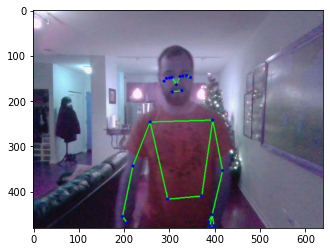

In [16]:
%%time
camera = cv2.VideoCapture(0)
return_value, image = camera.read()

image=np.real(camera.read()[1])
###image = cv2.resize(image, (0,0), fx=0.2, fy=0.2) 
### testing the algorithm 
%time
##image = all_images[i] 
tic = time.perf_counter()


image_height, image_width, _ = image.shape
with mp_pose.Pose(
    static_image_mode=False,
    model_complexity=0,
    min_tracking_confidence=0.8,
    min_detection_confidence=0.2) as pose:
        
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

points=results.pose_landmarks   
xrow=[]
for i in range(32):
    xrow.append(points.landmark[i].x)
    xrow.append(points.landmark[i].y)
   
annotated_image = image.copy()
mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
plt.imshow(annotated_image)
#cv2.imwrite('test.png', annotated_image)
print("done in "+str(time.perf_counter() - tic)+" seconds")
cv2.imshow('image',annotated_image)
cv2.waitKey(1000)
cv2.destroyAllWindows() 

In [32]:
cv2.destroyAllWindows()

## Collect the sample

#create a dataset

###https://github.com/nicknochnack/MediaPipePoseEstimation/blob/main/Media%20Pipe%20Pose%20Tutorial.ipynb
###https://github.com/nicknochnack/Body-Language-Decoder/blob/main/Body%20Language%20Decoder%20Tutorial.ipynb



path="C:\\Users\\taras\Desktop\\Vision_learning\\Selecting Hand Movement\\012 Packman\\"
## Main Function
####https://www.youtube.com/watch?v=06TE_U21FK4
##w,l=pyautogui.size()  
##pyautogui.PAUSE = 0.051
##pyautogui.click(w/2, l/2)
##kp="unknown"
###imgdown = cv2.imread(path+'/down.png')
# define a video capture object
camera = cv2.VideoCapture(0)
n=0
xs=[]
names=[]
with mp_pose.Pose(
        static_image_mode=False,
        model_complexity=0,
        min_tracking_confidence=0.8,
        min_detection_confidence=0.2) as pose:
 
    while(True):
        
        ### setting time
        tic = time.perf_counter()
        # Capture the video frame
        # by frame

        return_value, image = camera.read()
        image=np.real(camera.read()[1])
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if n<50:
            record=False
            cv2.putText(image, str("Get ready!!!!"),tuple([120, 240]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<75:
            move="Nothing is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<175:
            move="4 Nothing"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<200:
            move="Up is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<300:
            move="0 Up"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<325:
            move="Left is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<425:
            move="1 Left"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<450:
            move="Down is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<550:
            move="2 Down"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<575:
            move="Right is next"
            record=False
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        elif  n<675:
            move="3 Right"
            record=True
            cv2.putText(image, str(move+"" ),tuple([120, 340]), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
                      
        try:
            #Drawing the image
            mp_drawing.draw_landmarks( image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            
            ## storeing points
            points=results.pose_landmarks   
            xrow=[]
            for i in range(32):
                try:
                    xrow.append(points.landmark[i].x)
                    xrow.append(points.landmark[i].y)
                    xrow.append(points.landmark[i].z)
                except:
                    xrow.append(0)
                    xrow.append(0)
                    xrow.append(0)
            if record:                  
                xs.append(xrow)
                names.append(move)
        except:
            pass
            #predicting the action


        # Display the resulting frame
        cv2.imshow('frame', image)

        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        n=n+1
        ##print (n)
        
        if (cv2.waitKey(1) & 0xFF == ord('q'))or n>675:
            break

    # After the loop release the cap object
    camera.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

In [24]:
#create a dataset


all_images=[]
names=[]
tic = time.perf_counter()

time.sleep(1)
camera = cv2.VideoCapture(0)
time_pose=0.001
time_pose_cv2=1

num_pic_per_pose=100

cv2.imshow('image',imgdown)
cv2.waitKey(time_pose_cv2)
for i in range(num_pic_per_pose):
    time.sleep(time_pose)
    ##cv2.waitKey(time_pose_cv2)
    all_images.append(camera.read()[1])
    names.append("znothing")
    #print(i)
cv2.imshow('image',imgreset )
cv2.waitKey(1100)


##### movement sample
cv2.imshow('image',imgnorth)
cv2.waitKey(time_pose_cv2)
for i in range(num_pic_per_pose):
    time.sleep(time_pose)
    ##cv2.waitKey(time_pose_cv2)
    all_images.append(camera.read()[1])
    names.append("north")
   ### print(i)
cv2.imshow('image',imgreset )
cv2.waitKey(1100)

cv2.imshow('image',imgwest)
cv2.waitKey(time_pose_cv2)
for i in range(num_pic_per_pose):
    time.sleep(time_pose)
    ##cv2.waitKey(time_pose_cv2)
    all_images.append(camera.read()[1])
    names.append("west")
    ###print(i)
cv2.imshow('image',imgreset )
cv2.waitKey(1100)
 

cv2.imshow('image',imgsouth)
cv2.waitKey(time_pose_cv2)
for i in range(num_pic_per_pose):
    time.sleep(time_pose)
    ##cv2.waitKey(time_pose_cv2)
    all_images.append(camera.read()[1])
    names.append("south")
    #print(i)
cv2.imshow('image',imgreset )
cv2.waitKey(1100)


cv2.imshow('image',imgeast)
cv2.waitKey(time_pose_cv2)
for i in range(num_pic_per_pose):
    time.sleep(time_pose)
    ###cv2.waitKey(time_pose_cv2)
    all_images.append(camera.read()[1])
    names.append("east")
    #print(i)
cv2.imshow('image',imgreset )
cv2.waitKey(1100)



cv2.destroyAllWindows()
print("done in "+str(time.perf_counter() - tic)+" seconds")

##plt.imshow(np.real(all_images[10]))  

done in 24.581512199998542 seconds


In [32]:
##names

### Transforming the sample of images into points

In [ ]:

tic = time.perf_counter()
###i=11
xs=[]
with mp_pose.Pose(
    static_image_mode=False,
    model_complexity=0,
    min_tracking_confidence=.8,
    min_detection_confidence=0.2) as pose:
    for i in range(len(all_images)):

        ###xrow=   gmp(all_images[i])
        image=all_images[i]
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        points=results.pose_landmarks 
        xrow=[]
        for i in range(32):
            try:
                xrow.append(points.landmark[i].x)
                xrow.append(points.landmark[i].y)
            except:
                xrow.append(0)
                xrow.append(0)
        xs.append(xrow)
print("done in "+str(time.perf_counter() - tic)+" seconds")

## Create the model

In [33]:
## Create the model

tic = time.perf_counter()

encoder = LabelBinarizer()
y_train= encoder.fit_transform(names)
### https://www.datacamp.com/community/tutorials/decision-tree-classification-python
# Create Decision Tree classifer object
## train random forest instead
clf=RandomForestClassifier(n_estimators=40, max_depth=5)
clf = clf.fit(xs,y_train)

#Predict the response for test dataset
y_pred = clf.predict(xs)
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

print("done in "+str(time.perf_counter() - tic)+" seconds")
##https://mljar.com/blog/save-load-random-forest/
joblib.dump(clf, "./random_forest.joblib")

Accuracy: 1.0
done in 0.1505488000002515 seconds


['./random_forest.joblib']

In [34]:
i=0
print(y_pred[i])
print(names[i])

[0 0 0 0 1]
4 Nothing


In [35]:
i=100
print(y_pred[i])
print(names[i])

[1 0 0 0 0]
0 Up


In [36]:
i=200
print(y_pred[i])
print(names[i])

[0 1 0 0 0]
1 Left


In [37]:
i=300
print(y_pred[i])
print(names[i])

[0 0 1 0 0]
2 Down


In [38]:
i=400
print(y_pred[i])
print(names[i])

[0 0 0 1 0]
3 Right


In [39]:
i=500
print(y_pred[i])
print(names[i])

[0 0 0 1 0]
3 Right


## Main Function

#### Quit it with Q

In [43]:
## Main Function
####https://www.youtube.com/watch?v=06TE_U21FK4
w,l=pyautogui.size()  
pyautogui.PAUSE = 0.051
pyautogui.click(w/2, l/2)
kp="unknown"

# define a video capture object
camera = cv2.VideoCapture(0)
with mp_pose.Pose(
        static_image_mode=False,
        model_complexity=0,
        min_tracking_confidence=0.8,
        min_detection_confidence=0.2) as pose:
 
    while(True):
        ### setting time
        tic = time.perf_counter()
        # Capture the video frame
        # by frame

        return_value, image = camera.read()
        image=np.real(camera.read()[1])
        results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        try:
            #Drawing the image
            mp_drawing.draw_landmarks( image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
            
            ## storeing points
            points=results.pose_landmarks   
            xrow=[]
            for i in range(32):
                try:
                    xrow.append(points.landmark[i].x)
                    xrow.append(points.landmark[i].y)
                except:
                    xrow.append(0)
                    xrow.append(0)
            #predicting the action
            xs_test=[]
            xs_test.append(xrow)
            y_pred_test = clf.predict(xs_test)
            #### pressing the button based on the acction
            i=0


            if (y_pred_test[i][4]==1):
                    send_keys("{up}")
                    k="down"
                    kp="down"
            elif (y_pred_test[i][1]==1):
                    k="north"
                    kp="north"
                    send_keys('{VK_UP down}')
            elif (y_pred_test[i][3]==1):
                    k="west"
                    kp="west"
                    send_keys('{VK_LEFT down}')
            elif (y_pred_test[i][0]==1):
                    k="east"
                    kp="east"
                    send_keys('{VK_RIGHT down}')
            elif (y_pred_test[i][2]==0):
                    k="south"
                    kp="south"       
                    send_keys('{VK_DOWN down}')
            else:
            
                    k="unknown"
                    kp="unknown"

            result=( "said "+k+"| in "+str(round(time.perf_counter() - tic,2)) )
            print( result)

        except:
            pass
            #predicting the action


        # Display the resulting frame
        cv2.imshow('frame', image)

        # the 'q' button is set as the
        # quitting button you may use any
        # desired button of your choice
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # After the loop release the cap object
    camera.release()
    # Destroy all the windows
    cv2.destroyAllWindows()

said up| in 0.54
said up| in 0.15
said up| in 0.13
said up| in 0.09
said up| in 0.11
said up| in 0.13
said up| in 0.12
said up| in 0.11
said up| in 0.11
said up| in 0.09
said up| in 0.09
said up| in 0.09
said up| in 0.09
said up| in 0.17
said unknown| in 0.07
said unknown| in 0.09
said unknown| in 0.08
said left| in 0.16
said unknown| in 0.04
said unknown| in 0.06
said unknown| in 0.05
said unknown| in 0.05
said left| in 0.11
said unknown| in 0.05
said unknown| in 0.06
said down| in 0.09
said down| in 0.12
said down| in 0.13
said down| in 0.09
said down| in 0.14
said down| in 0.11
said down| in 0.11
said down| in 0.14
said down| in 0.11
said down| in 0.12
said down| in 0.12
said down| in 0.11
said down| in 0.11
said down| in 0.13
said down| in 0.11
said down| in 0.11
said down| in 0.12
said down| in 0.11
said down| in 0.11
said down| in 0.14
said down| in 0.11
said down| in 0.11
said down| in 0.12
said down| in 0.11
said down| in 0.11
said down| in 0.14
said down| in 0.09
said down| in

In [108]:

    cv2.destroyAllWindows()

In [ ]:
zz

In [ ]:
aaaaaaadddddddssssssssss aaaaaassssssss       